In [14]:
# import math package
import math

# define the function to calculate haversine distance 
def haversine(lat1, lon1, lat2, lon2):
    R = 6371.0  # Earth's radius in kilometers
    lat1, lon1, lat2, lon2 = map(math.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = math.sin(dlat / 2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    return R * c 

In [15]:
# assign the latitudes and longitudes
jakarta_lat, jakarta_lon, singapore_lat, singapore_lon = -6.2000, 106.8167, 1.3521, 103.8198

In [25]:
# calculate the haversine distance between Jakarta and Singapore 
haversine_distance = haversine(jakarta_lat, jakarta_lon, singapore_lat, singapore_lon)
print(f"The distance between Jakarta and Singapore is {distance:.2f} kilometers.")

The distance between Jakarta and Singapore is -0.54 kilometers.


In [17]:
from geopy.distance import geodesic

def vincenty(lat1, lon1, lat2, lon2):
    point1 = (lat1, lon1)
    point2 = (lat2, lon2)
    return geodesic(point1, point2).kilometers

In [31]:
import math

def vincenty(lat1, lon1, lat2, lon2):
    # WGS-84 ellipsoid parameters
    a = 6378137.0  # Major radius [meters]
    f = 1 / 298.257223563  # Flattening
    b = (1 - f) * a  # Minor radius

    # Convert lat/lon from degrees to radians
    lat1, lon1, lat2, lon2 = map(math.radians, [lat1, lon1, lat2, lon2])

    # Differences in coordinates
    L = lon2 - lon1
    U1 = math.atan((1 - f) * math.tan(lat1))
    U2 = math.atan((1 - f) * math.tan(lat2))

    sinU1 = math.sin(U1)
    cosU1 = math.cos(U1)
    sinU2 = math.sin(U2)
    cosU2 = math.cos(U2)

    # Iterative process to calculate lambda
    lambda_ = L
    iter_limit = 100
    for i in range(iter_limit):
        sin_lambda = math.sin(lambda_)
        cos_lambda = math.cos(lambda_)
        sin_sigma = math.sqrt((cosU2 * sin_lambda)**2 +
                              (cosU1 * sinU2 - sinU1 * cosU2 * cos_lambda)**2)
        if sin_sigma == 0:
            return 0  # Points are coincident
        cos_sigma = sinU1 * sinU2 + cosU1 * cosU2 * cos_lambda
        sigma = math.atan2(sin_sigma, cos_sigma)
        sin_alpha = cosU1 * cosU2 * sin_lambda / sin_sigma
        cos2_alpha = 1 - sin_alpha**2
        cos2_sigma_m = cos_sigma - 2 * sinU1 * sinU2 / cos2_alpha
        C = f / 16 * cos2_alpha * (4 + f * (4 - 3 * cos2_alpha))
        lambda_prev = lambda_
        lambda_ = L + (1 - C) * f * sin_alpha * (sigma + C * sin_sigma *
                      (cos2_sigma_m + C * cos_sigma *
                      (-1 + 2 * cos2_sigma_m**2)))
        if abs(lambda_ - lambda_prev) < 1e-12:
            break
    else:
        return None  # formula failed to converge

    u_squared = cos2_alpha * (a**2 - b**2) / b**2
    A = 1 + u_squared / 16384 * (4096 + u_squared * (-768 + u_squared * (320 - 175 * u_squared)))
    B = u_squared / 1024 * (256 + u_squared * (-128 + u_squared * (74 - 47 * u_squared)))
    delta_sigma = B * sin_sigma * (cos2_sigma_m + B / 4 *
                      (cos_sigma * (-1 + 2 * cos2_sigma_m**2) -
                      B / 6 * cos2_sigma_m * (-3 + 4 * sin_sigma**2) *
                      (-3 + 4 * cos2_sigma_m**2)))
    s = b * A * (sigma - delta_sigma)

    return s  # Distance in meters

# Example: Calculate the Vincenty distance between Jakarta and Singapore
jakarta_lat, jakarta_lon = -6.2000, 106.8167
singapore_lat, singapore_lon = 1.3521, 103.8198

vincenty_distance = vincenty(jakarta_lat, jakarta_lon, singapore_lat, singapore_lon) / 1000
print(f"The Vincenty distance between Jakarta and Singapore is {distance / 1000:.2f} kilometers.")

The Vincenty distance between Jakarta and Singapore is -0.00 kilometers.


In [20]:
from geopy.distance import geodesic

def vincenty(lat1, lon1, lat2, lon2):
    point1 = (lat1, lon1)
    point2 = (lat2, lon2)
    return geodesic(point1, point2).kilometers

jakarta_lat, jakarta_lon, singapore_lat, singapore_lon = -6.2000, 106.8167, 1.3521, 103.8198

distance = vincenty(jakarta_lat, jakarta_lon, singapore_lat, singapore_lon)
print(f"The Vincenty distance between Jakarta and Singapore is {distance:.2f} kilometers.")

The Vincenty distance between Jakarta and Singapore is 899.07 kilometers.


In [27]:
import math

def euclidean(lat1, lon1, lat2, lon2):
    x = (lon2 - lon1) * math.cos((lat1 + lat2) / 2 * math.pi / 180)
    y = lat2 - lat1
    return math.sqrt(x**2 + y**2) * 111.32  # Approximation of degrees to kilometers

jakarta_lat, jakarta_lon, singapore_lat, singapore_lon = -6.2000, 106.8167, 1.3521, 103.8198

euclidean_distance = euclidean(jakarta_lat, jakarta_lon, singapore_lat, singapore_lon)
print(f"The Euclidean distance between Jakarta and Singapore is {distance:.2f} kilometers.")

The Euclidean distance between Jakarta and Singapore is -0.54 kilometers.


In [29]:
import math 

def manhattan(lat1, lon1, lat2, lon2):
    lat_dist = abs(lat2 - lat1) * 111.32  # Convert degrees to kilometers
    lon_dist = abs(lon2 - lon1) * 111.32 * math.cos(lat1 * math.pi / 180)
    return lat_dist + lon_dist

jakarta_lat, jakarta_lon, singapore_lat, singapore_lon = -6.2000, 106.8167, 1.3521, 103.8198

manhattan_distance = manhattan(jakarta_lat, jakarta_lon, singapore_lat, singapore_lon)
print(f"The Manhattan distance between Jakarta and Singapore is {distance:.2f} kilometers.")

The Manhattan distance between Jakarta and Singapore is -0.54 kilometers.


In [24]:
import numpy as np

def cosine_similarity(lat1, lon1, lat2, lon2):
    vector1 = np.array([np.cos(lat1), np.cos(lon1)])
    vector2 = np.array([np.cos(lat2), np.cos(lon2)])
    cos_sim = np.dot(vector1, vector2) / (np.linalg.norm(vector1) * np.linalg.norm(vector2))
    return cos_sim

jakarta_lat, jakarta_lon, singapore_lat, singapore_lon = -6.2000, 106.8167, 1.3521, 103.8198

distance = cosine_similarity(jakarta_lat, jakarta_lon, singapore_lat, singapore_lon)
print(f"The Cosine Similarity distance between Jakarta and Singapore is {distance:.2f} kilometers.")

The Cosine Similarity distance between Jakarta and Singapore is -0.54 kilometers.


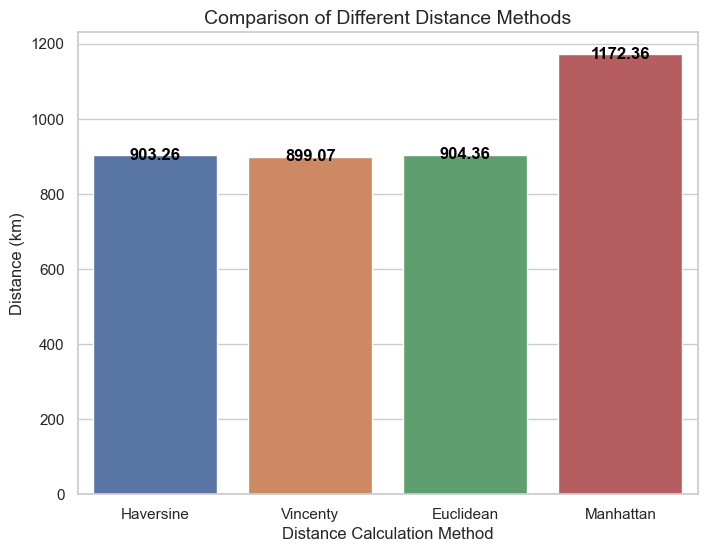

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Example data for the four distance methods
data = {
    'Method': ['Haversine', 'Vincenty', 'Euclidean', 'Manhattan'],
    'Distance (km)': [haversine_distance, vincenty_distance, euclidean_distance, manhattan_distance]
}

# Convert data to a DataFrame
df = pd.DataFrame(data)

# Set the style for the plot
sns.set(style="whitegrid")

# Create a bar plot
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='Method', y='Distance (km)', data=df, hue='Method', legend=False)

# Add labels inside the bars
for index, row in df.iterrows():
    ax.text(index, row['Distance (km)'] - 0.1, f'{row["Distance (km)"]:.2f}', 
            color='black', ha="center", va="center", fontsize=12, fontweight='bold')

# Set title and labels
plt.title('Comparison of Different Distance Methods', fontsize=14)
plt.xlabel('Distance Calculation Method', fontsize=12)
plt.ylabel('Distance (km)', fontsize=12)

# Display the plot
plt.show()
